In [1]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [2]:

#file_path = '/home/poonam/Downloads/future_predictions_on_grocessary store/group1_ID3_time_combined_index.csv'
#file_path = '/home/poonam/Downloads/future_predictions_on_grocessary store/group1_all_index.csv'

# Load the data
#data = pd.read_csv('/home/poonam/Downloads/future_predictions_on_grocessary store/group1_ID1_time_combined_index.csv')#group1_ID2_time_combined_index.csv')#, engine='python', skipfooter=3)
#data.columns = ['timestamp','groupNo','groupID','Memory_Allocated','Memory_Used', 'CPU_Allocated', 'CPU_Used', 'Network_bandwidth_utilization', 'Storage_space_utilization']
#print(data.head())
#print(data.describe())
data_cpu5 = pd.read_csv('/home/poonam/Downloads/future_predictions_on_grocessary store/group1_ID5_CPU_index.csv')#group1_ID2_time_combined_index.csv')#, engine='python', skipfooter=3)
data_cpu5.columns = ['timestamp','CPU_Used']

print('Ok')
# A bit of pre-processing to make it nicer
#df.columns = ['week', 'month', 'date', 'time','year','groupNo','groupID','Memory_Allocated','Memory_Used', 'CPU_Allocated', 'CPU_Used', 'Network_bandwidth_utilization', 'Storage_space_utilization']
#data.set_index("timestamp", inplace = True)  #will set the timestamp as rows_name

#data_cpu5['Month']=pd.to_datetime(data_cpu5['timestamp'], format='%Y-%m-%d')
data_cpu5.set_index(['timestamp'], inplace=True)
#print(data_cpu5.head())
### Testing For Stationarity

#Ho: It is non stationary
#H1: It is stationary
#data_use = data[2800:4200]
#result = seasonal_decompose(data_use['CPU_Used'],model ='multiplicative')




Ok


In [82]:
data_cpu5_1 = data_cpu5.iloc[30000:32000]
#fig = plt.figure()
#data_cpu5_1.plot()

#plot.new()

(array([6.7930e+03, 1.7507e+04, 2.0060e+03, 6.9500e+04, 5.2790e+03,
        6.7100e+02, 1.2500e+02, 5.0000e+00, 3.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 9.0000e+00, 3.6000e+01, 3.4000e+01,
        1.3000e+01, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        7.0000e+00, 2.0000e+00, 1.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 6.0000e+00, 2.0000e+00, 6.0000e+00,
        1.0000e+01, 1.0000e+01, 1.3000e+01, 9.00

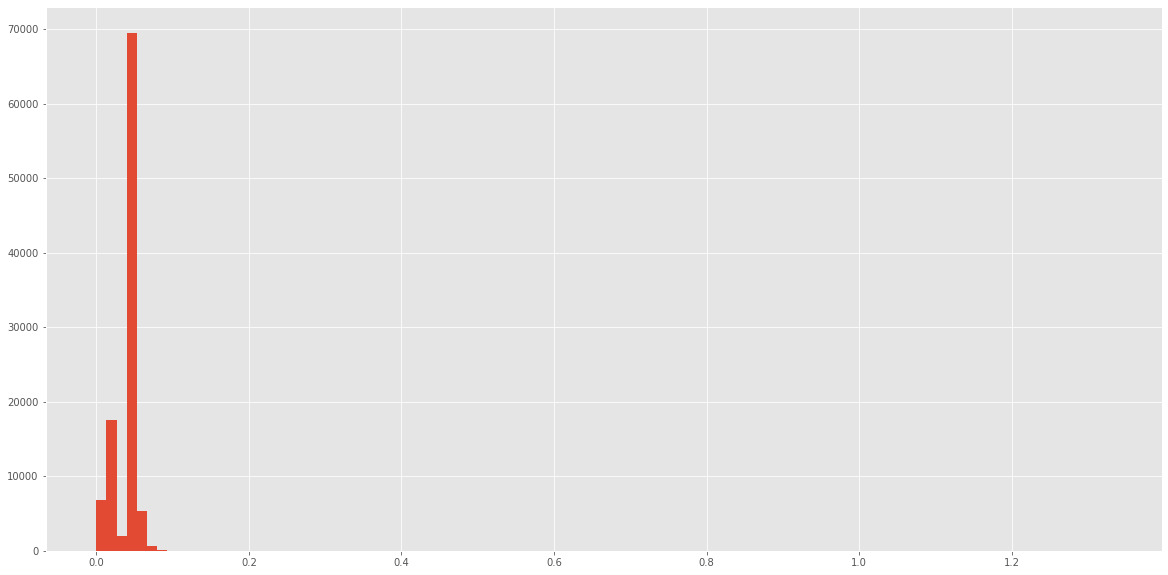

In [94]:
plt.hist(data_cpu5['CPU_Used'], bins = 100)#[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4] )

In [43]:
#gridsize = (3, 2)
#fig = plt.figure(figsize=(12, 8))
#ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
#data_cpu5_1 = data_cpu5.iloc[10000:]
#fig = plt.figure()
#ax1.plot(data_cpu5_1['CPU_Used'])


In [44]:

from statsmodels.tsa.stattools import adfuller
adfuller(data_cpu5_1['CPU_Used'])


(-43.786914729767254,
 0.0,
 0,
 1999,
 {'1%': -3.4336254962865045,
  '5%': -2.862986937508278,
  '10%': -2.567540287745173},
 -6421.387301989507)

In [45]:

def adfuller_test(CPU_Used):
    result=adfuller(CPU_Used)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



In [46]:
adfuller_test(data_cpu5_1['CPU_Used'])


ADF Test Statistic : -43.786914729767254
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1999
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [47]:

data_cpu5_1['CPU_Used_dif'] = data_cpu5_1['CPU_Used']- data_cpu5_1['CPU_Used'].shift(6)


<ipython-input-47-10c55ec860fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cpu5_1['CPU_Used_dif'] = data_cpu5_1['CPU_Used']- data_cpu5_1['CPU_Used'].shift(6)


In [65]:
data_cpu5_1['CPU_Used_dif'] = data_cpu5_1['CPU_Used']- data_cpu5_1['CPU_Used'].shift(230)
print(data_cpu5_1['CPU_Used_dif'].head(10))


timestamp
2019-12-19 21:53:08   NaN
2019-12-19 21:59:14   NaN
2019-12-19 22:05:29   NaN
2019-12-19 22:11:48   NaN
2019-12-19 22:17:57   NaN
2019-12-19 22:24:09   NaN
2019-12-19 22:30:12   NaN
2019-12-19 22:36:19   NaN
2019-12-19 22:42:36   NaN
2019-12-19 22:48:44   NaN
Name: CPU_Used_dif, dtype: float64


<ipython-input-65-d124ef3e5c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cpu5_1['CPU_Used_dif'] = data_cpu5_1['CPU_Used']- data_cpu5_1['CPU_Used'].shift(230)


In [66]:
print(data_cpu5_1['CPU_Used'].head(10))

timestamp
2019-12-19 21:53:08    0.04
2019-12-19 21:59:14    0.04
2019-12-19 22:05:29    0.04
2019-12-19 22:11:48    0.04
2019-12-19 22:17:57    0.04
2019-12-19 22:24:09    0.04
2019-12-19 22:30:12    0.04
2019-12-19 22:36:19    0.04
2019-12-19 22:42:36    0.04
2019-12-19 22:48:44    0.04
Name: CPU_Used, dtype: float64


ADF Test Statistic : -17.48484576290562
p-value : 4.469105023194016e-30
#Lags Used : 7
Number of Observations Used : 1762
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


/home/poonam/myenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

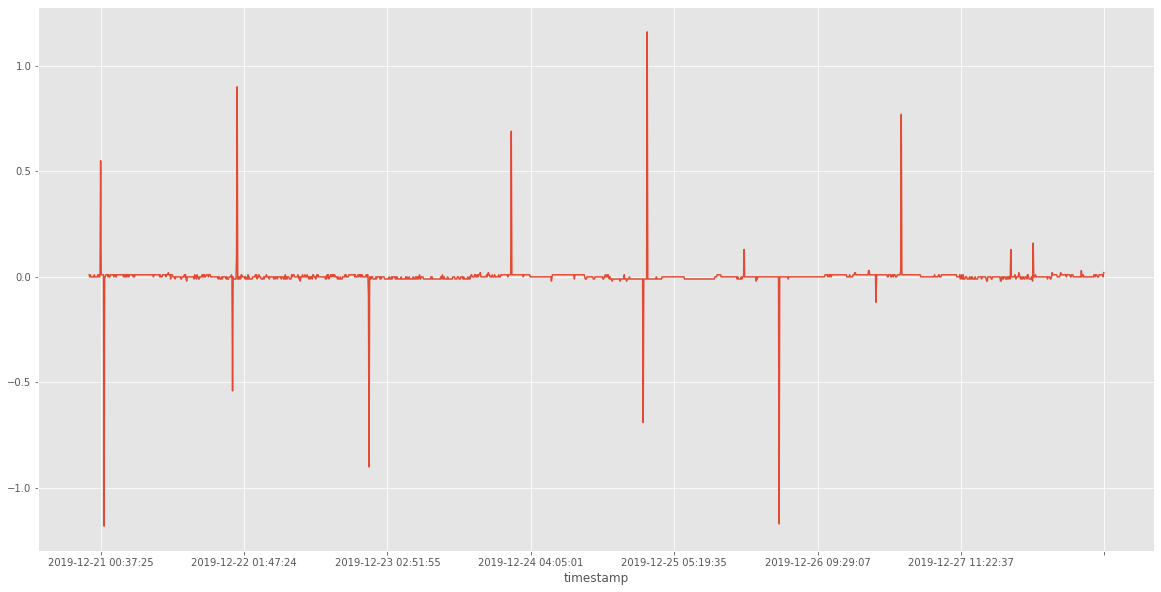

In [67]:

adfuller_test(data_cpu5_1['CPU_Used_dif'].dropna())
data_cpu5_1['CPU_Used_dif'].plot()


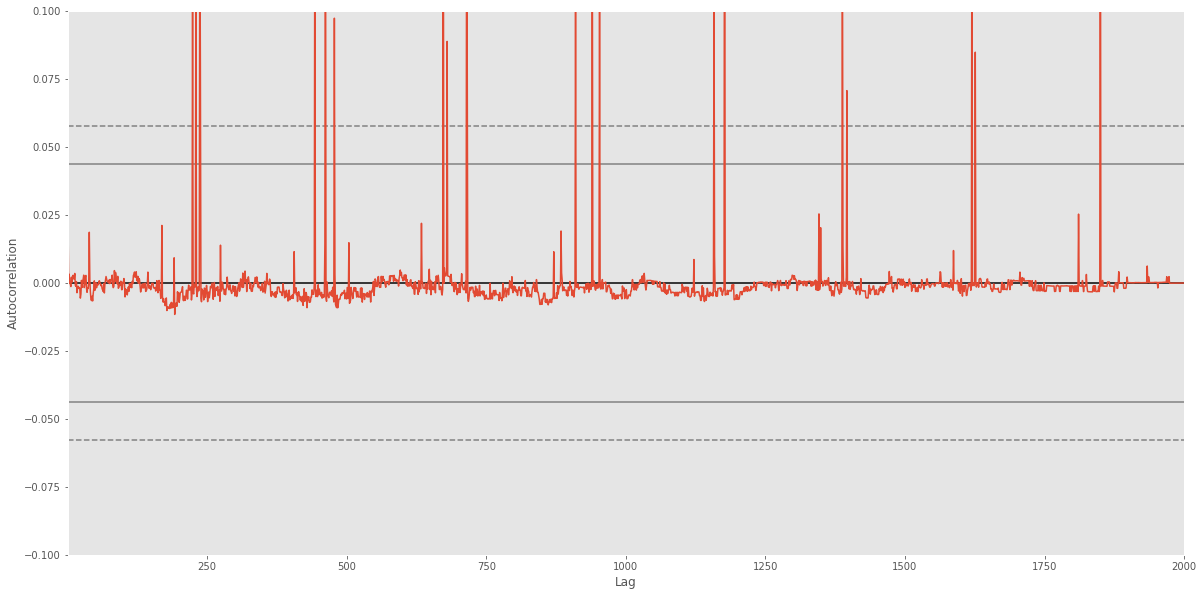

In [68]:
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_cpu5_1['CPU_Used'])
plt.ylim([-0.1,0.1])
plt.show()


In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [70]:
from statsmodels.tsa.arima_model import ARIMA

In [71]:
model=ARIMA(data_cpu5_1['CPU_Used'],order=(1,1,1))
model_fit=model.fit()

/home/poonam/myenv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/poonam/myenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated f

In [72]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.CPU_Used   No. Observations:                 1999
Model:                 ARIMA(1, 1, 1)   Log Likelihood                2990.768
Method:                       css-mle   S.D. of innovations              0.054
Date:                Wed, 30 Sep 2020   AIC                          -5973.535
Time:                        19:52:30   BIC                          -5951.134
Sample:                             1   HQIC                         -5965.310
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.087e-07   3.49e-06      0.260      0.795   -5.93e-06    7.75e-06
ar.L1.D.CPU_Used     0.0219      0.022      0.976      0.329      -0.022       0.066
ma.L1.D.CPU_Used    -0.9980      0.004   -226.768      0.000      -1.007      -0.989
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           45.5858           +0.0000j           45.5858            0.0000
MA.1            1.0020           +0.0000j            1.0020            0.0000
-----------------------------------------------------------------------------
"""

<ipython-input-73-f55f3148f574>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cpu5_1['forecast']=model_fit.predict(dynamic=True)
/home/poonam/myenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

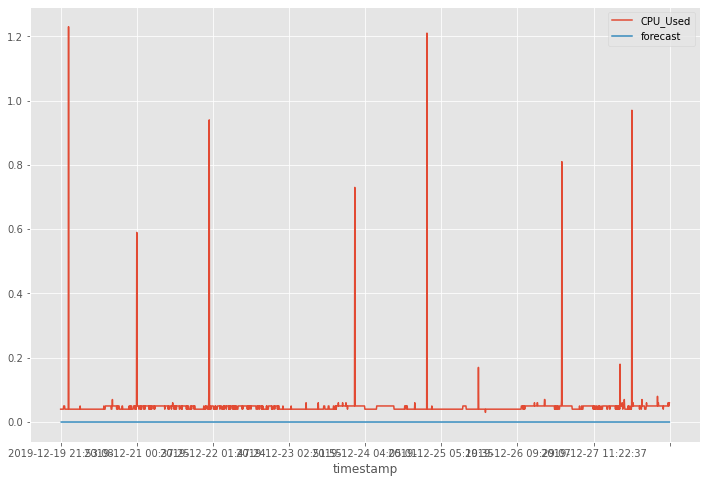

In [73]:
data_cpu5_1['forecast']=model_fit.predict(dynamic=True)
data_cpu5_1[['CPU_Used','forecast']].plot(figsize=(12,8))


In [74]:
import statsmodels.api as sm

In [75]:
model=sm.tsa.statespace.SARIMAX(data_cpu5_1['CPU_Used'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/home/poonam/myenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/poonam/myenv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<ipython-input-76-1f73c1a192d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cpu5_1['forecast']=results.predict(dynamic=True)
/home/poonam/myenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='timestamp'>

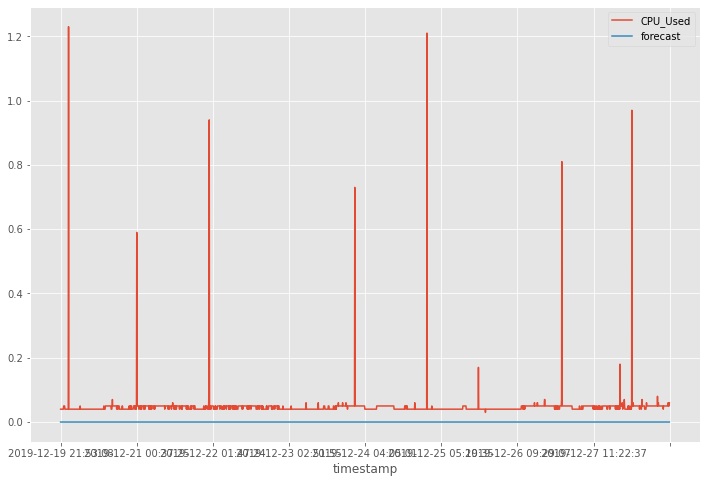

In [76]:
data_cpu5_1['forecast']=results.predict(dynamic=True)
data_cpu5_1[['CPU_Used','forecast']].plot(figsize=(12,8))


In [77]:
from pandas.tseries.offsets import DateOffset
print(data_cpu5_1.index[-1])
print( DateOffset(months=x)for x in range(0,24))

future_dates=[data_cpu5_1.index[-1] + str(DateOffset(months=x)) for x in range(0,30)]

2019-12-28 13:24:28
<generator object <genexpr> at 0x7f835f60ef90>


In [78]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_cpu5_1.columns)

In [79]:
future_datest_df.tail()

,CPU_Used,CPU_Used_dif,forecast
2019-12-28 13:24:28<DateOffset: months=25>,NaN,NaN,NaN
2019-12-28 13:24:28<DateOffset: months=26>,NaN,NaN,NaN
2019-12-28 13:24:28<DateOffset: months=27>,NaN,NaN,NaN
2019-12-28 13:24:28<DateOffset: months=28>,NaN,NaN,NaN
2019-12-28 13:24:28<DateOffset: months=29>,NaN,NaN,NaN


In [80]:
future_df=pd.concat([data_cpu5_1,future_datest_df])

/home/poonam/myenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

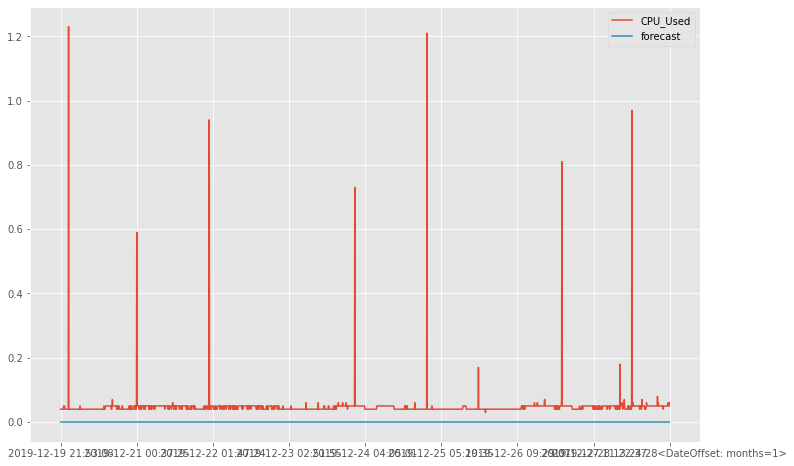

In [81]:
future_df['forecast'] = results.predict(dynamic= True)  
future_df[['CPU_Used', 'forecast']].plot(figsize=(12, 8))